<a href="https://colab.research.google.com/github/bsenst/UWWi_DataDive_Dec22/blob/main/external_datasets/news/clients_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
! wget https://github.com/bsenst/UWWi_DataDive_Dec22/raw/main/building_client_persona/client_data_with_ADI_SVI_Indices.csv.zip

--2022-12-04 09:51:16--  https://github.com/bsenst/UWWi_DataDive_Dec22/raw/main/building_client_persona/client_data_with_ADI_SVI_Indices.csv.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bsenst/UWWi_DataDive_Dec22/main/building_client_persona/client_data_with_ADI_SVI_Indices.csv.zip [following]
--2022-12-04 09:51:16--  https://raw.githubusercontent.com/bsenst/UWWi_DataDive_Dec22/main/building_client_persona/client_data_with_ADI_SVI_Indices.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23275537 (22M) [application/zip]
Saving to: ‘client_data_with_ADI_SVI_Indices.csv.zip’

client_d

In [4]:
! unzip /content/client_data_with_ADI_SVI_Indices.csv.zip

Archive:  /content/client_data_with_ADI_SVI_Indices.csv.zip
  inflating: client_data_with_ADI_SVI_Indices.csv  


In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

clients = pd.read_csv("/content/client_data_with_ADI_SVI_Indices.csv.zip")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796761 entries, 0 to 796760
Data columns (total 19 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Client_Id                                  796761 non-null  int64  
 1   Client_CreateStamp                         796761 non-null  object 
 2   Client_EditStamp                           796761 non-null  object 
 3   ClientOption_PreferredLanguageOfCaller     796761 non-null  object 
 4   ClientSystem_PreferredLanguageOther        431 non-null     object 
 5   ClientAddressus_ClientAddressus_city       795992 non-null  object 
 6   ClientAddressus_ClientAddressus_county     796761 non-null  object 
 7   ClientAddressus_ClientAddressus_state      796761 non-null  object 
 8   ClientAddressus_ClientAddressus_zip        756533 non-null  float64
 9   ClientCustom_AgeOfPersonNeedingAssistance  91447 non-null   float64
 10  ClientCu

# Almost 800k Clients

In [7]:
len(clients.Client_Id.unique())

796761

# Available Client Features

In [8]:
clients.isna().sum()

Client_Id                                         0
Client_CreateStamp                                0
Client_EditStamp                                  0
ClientOption_PreferredLanguageOfCaller            0
ClientSystem_PreferredLanguageOther          796330
ClientAddressus_ClientAddressus_city            769
ClientAddressus_ClientAddressus_county            0
ClientAddressus_ClientAddressus_state             0
ClientAddressus_ClientAddressus_zip           40228
ClientCustom_AgeOfPersonNeedingAssistance    705314
ClientCustom_EthnicityOther                  796574
ClientOption_GenderOptionId                       0
ClientOption_VeteranStatusOptionlist              0
ADI_STATERANK                                329829
RPL_THEMES                                    17536
RPL_THEME1                                    17536
RPL_THEME2                                    17536
RPL_THEME3                                    17536
RPL_THEME4                                    17536
dtype: int64

# demographic features

## twice as many women as men

In [9]:

for k, v in clients.ClientOption_GenderOptionId.value_counts().items():
  if k == "[]":
    k = "Not answered"
  else:
    k = k.split("'")[1]
  print(k.ljust(14), v)

Not answered   549757
Female         166417
Male           79077
Unknown        1227
Transgender    200
Refused        47
Other          27
DO NOT USE - Transgendered Female to Male 9


In [153]:
age = pd.Series(clients.ClientCustom_AgeOfPersonNeedingAssistance[clients.ClientCustom_AgeOfPersonNeedingAssistance.notna()].astype(np.int64))
age

43        77
59        25
110       45
118       44
131       50
          ..
796733    22
796736    24
796743    30
796750    49
796752    16
Name: ClientCustom_AgeOfPersonNeedingAssistance, Length: 91447, dtype: int64

## mean age 45 (min 15, max 84)

In [159]:
# https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe

q_low = age.quantile(0.01)
q_hi  = age.quantile(0.99)

age_filtered = age[(age < q_hi) & (age > q_low)]

age_filtered.describe().astype(np.int64)

count    89400
mean        45
std         16
min         15
25%         31
50%         45
75%         58
max         84
Name: ClientCustom_AgeOfPersonNeedingAssistance, dtype: int64

## Veterans

In [11]:
clients.ClientOption_VeteranStatusOptionlist.value_counts()

[]                      672889
['No']                   91217
['N/A']                  27131
['Yes']                   5317
['Yes', 'No']              100
['No', 'N/A']               97
['Yes', 'N/A']               7
['Yes', 'No', 'N/A']         3
Name: ClientOption_VeteranStatusOptionlist, dtype: int64

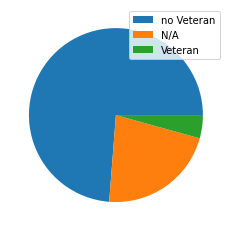

In [26]:
plt.pie(sorted({(v) for k, v in clients.ClientOption_VeteranStatusOptionlist.value_counts().items()}, reverse=True)[1:4])
plt.legend(["no Veteran", "N/A", "Veteran"])
plt.show()

## rare data on Ethnicity

In [163]:
clients.ClientCustom_EthnicityOther[clients.ClientCustom_EthnicityOther.notna()].value_counts()

Unknown                       39
mixed                         11
Arabic                         5
Biracial                       5
Hmong                          4
                              ..
cilcian                        1
Serbian                        1
MIXED, UNSPECIFIED             1
Caller simply said "other"     1
Morroco                        1
Name: ClientCustom_EthnicityOther, Length: 106, dtype: int64

# Preferred Languages

In [13]:
clients.ClientOption_PreferredLanguageOfCaller.value_counts()

[]                            671829
['English']                   114121
['Spanish']                     7961
['Undetermined']                1286
['Declined']                     567
['Other']                        545
['American Sign Language']       174
['Hmong']                         91
['Chinese']                       52
['French']                        34
['Vietnamese']                    31
['Russian']                       20
['German']                        20
['Korean']                        15
['Italian']                       10
['Tagalog']                        5
Name: ClientOption_PreferredLanguageOfCaller, dtype: int64

# socioeconomic factors

## non english speakers with lower ADI

In [14]:
print(clients[clients.ClientOption_PreferredLanguageOfCaller=="['English']"].ADI_STATERANK.mean())
print(clients[clients.ClientOption_PreferredLanguageOfCaller=="['Spanish']"].ADI_STATERANK.mean())
print(clients[clients.ClientOption_PreferredLanguageOfCaller!="['English']"].ADI_STATERANK.mean())


6.838418515905455
6.376187202764509
5.742406586030799


## Clients almost equally distrib regarding Area Deprivation Index ADI

## RPL Theme

The four themes in the SVI tool are:
- Socioeconomic status - income, poverty, employment and education.
- Household composition - age, single parenting and disability.
- Minority status and language - race, ethnicity.
- English Language Proficiency, housing and transportation - housing structure, crowding and vehicle access.

In [170]:
clients[["RPL_THEMES", "RPL_THEME1", "RPL_THEME2", "RPL_THEME3", "RPL_THEME4"]].describe()

,RPL_THEMES,RPL_THEME1,RPL_THEME2,RPL_THEME3,RPL_THEME4
count,779225.000000,779225.000000,779225.000000,779225.000000,779225.000000
mean,0.682957,0.601629,0.612291,0.819041,0.745665
std,0.305410,0.362435,0.332014,0.214595,0.266190
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.408500,0.211300,0.267600,0.732400,0.591500
50%,0.690100,0.549300,0.732400,0.915500,0.845100
75%,1.000000,1.000000,0.929600,0.985900,0.971800
max,1.000000,1.000000,1.000000,1.000000,1.000000


# Geographic Features

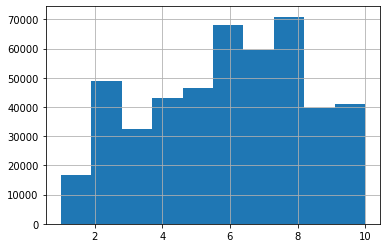

In [10]:
clients.ADI_STATERANK.hist()
# seems like clients living in areas with higher standard of living are also calling UWWi ?
# interpretation of ADI required

## basic NLP to remove city duplicates

In [61]:
cities = list(clients.ClientAddressus_ClientAddressus_city.value_counts().index)
len(cities)
# according to google there are 804 cities in WI --> duplicates

4997

In [62]:
# make lower and removing whitespaces - reduces duplicates by 1/4
cities = list(pd.Series([c.lower().strip() for c in cities]).unique())
len(cities)

3358

In [41]:
! pip install python-Levenshtein
from Levenshtein import distance as levenshtein_distance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 174 kB 5.1 MB/s 
     |████████████████████████████████| 2.2 MB 51.4 MB/s 


In [110]:
# https://codereview.stackexchange.com/questions/217065/calculate-levenshtein-distance-between-two-strings-in-python

similar_cities = dict()

for c1 in cities:
  for c2 in cities:
    if c1 != c2:
      ld = levenshtein_distance(c1, c2)
      similarity = 1 - ld / max(len(c1), len(c2))
      if similarity > 0.85:
        if c1 not in similar_cities.keys() or c2 not in similar_cities.keys():
          similar_cities[c1] = set()
          similar_cities[c1].add(c2)
        elif c1 in similar_cities.keys():
          similar_cities[c1].add(c2)
        elif c2 in similar_cities.keys():
          similar_cities[c2].add(c1)
        else:
          print(c1, c2, similarity)

similar_cities

{'milwaukee': {'milwakee'},
 'madison': {'msdison'},
 'green bay': {'greenbay'},
 'la crosse': {'lacrosse'},
 'appleton': {'appleto'},
 'kenosha': {'kenosha`'},
 'janesville': {'janesvielle'},
 'fond du lac': {'fon du lac'},
 'west bend': {'westbend'},
 'wisconsin rapids': {'wisconsin rapid'},
 'sheboygan': {'sheyboygan'},
 'west allis': {'west allies'},
 'middleton': {'middletown'},
 'menomonee falls': {'menonomee falls'},
 'south milwaukee': {'south miwaukee'},
 'brookfield': {'broomfield'},
 'cudahy': {'cudahay'},
 'oconomowoc': {'occonomowoc'},
 'germantown': {'hermantown'},
 'wauwatosa': {'wawatosa'},
 'pewaukee': {'pewakee'},
 'muskego': {'muskegon'},
 'deforest': {'de forest'},
 'grafton': {'granton'},
 'shawano': {'shanwano'},
 'west salem': {'west saleem'},
 'mc farland': {'mcfarland'},
 'de forest': {'deforest'},
 'wautoma': {'waucoma'},
 'twin lakes': {'twin lake'},
 'oconto falls': {'ocontofalls'},
 'medford': {'bedford'},
 'allenton': {'allentown'},
 'baldwin': {'ballwin'}

## common cities of clients

milwaukee    247473
madison       96098
la crosse     25844
green bay     24015
wausau        22268
racine        20106
dtype: int64


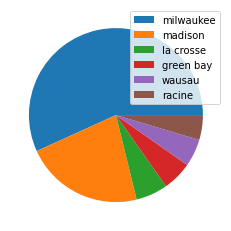

In [125]:
common_cities = pd.Series(pd.Series([c.lower().strip() for c in clients.ClientAddressus_ClientAddressus_city if type(c)==str]).value_counts()[:6])
print(common_cities)
plt.pie(common_cities)
plt.legend(list(common_cities.index))
plt.show()

## common client counties

milwaukee    271879
dane         123650
la crosse     31740
marathon      31649
waukesha      28043
brown         27637
racine        25333
winnebago     22317
portage       19934
rock          18828
dtype: int64


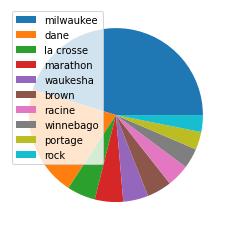

In [127]:
common = pd.Series(pd.Series([c.lower().strip() for c in clients.ClientAddressus_ClientAddressus_county if type(c)==str]).value_counts()[:10])
print(common)
plt.pie(common)
plt.legend(list(common.index))
plt.show()

## client states WI >> MN>IA>TX>IL>MI

mn    7737
ia    3103
tx    1767
il    1702
mi    1623
fl     448
ca     434
in     309
oh     282
dtype: int64


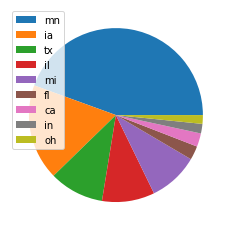

In [130]:
common = pd.Series(pd.Series([c.lower().strip() for c in clients.ClientAddressus_ClientAddressus_state if type(c)==str]).value_counts()[1:10])
print(common)
plt.pie(common)
plt.legend(list(common.index))
plt.show()

# Clients Accounts: Creation & Editing 

In [166]:
created = pd.to_datetime(clients.Client_CreateStamp)

In [167]:
edited = pd.to_datetime(clients.Client_EditStamp)

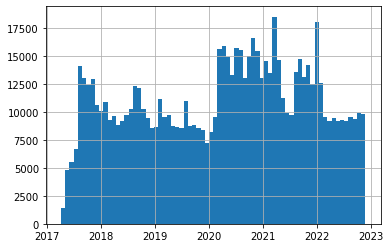

In [177]:
created.hist(bins=6*12)

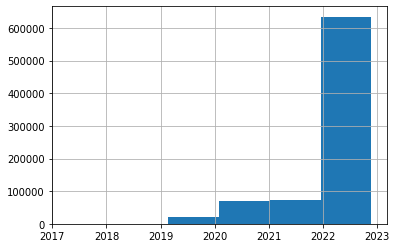

In [176]:
edited.hist(bins=6)